In [1]:
# Step 1: Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Step 2: Loading the dataset
# Replace 'dataset.csv' with the correct file name if necessary
df = pd.read_csv('C:\\Users\\D.SURESH KUMAR\\Desktop\\New folder\\data.xlsx - Sheet1.csv')

# Step 2: Display the head, shape and description of the data
print("Head of the dataset:")
print(df.head())

print("\nShape of the dataset:")
print(df.shape)

print("\nDescription of the dataset:")
print(df.describe())


Head of the dataset:
  Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1  

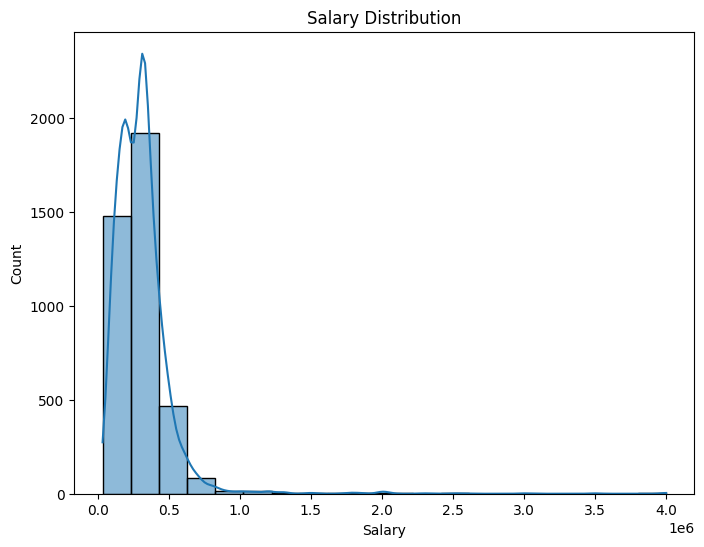

In [3]:

# Step 3: Univariate Analysis - Histogram, Boxplots, Countplots, etc.
# Let's analyze the target variable 'Salary' first
plt.figure(figsize=(8,6))
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Salary Distribution')
plt.show()


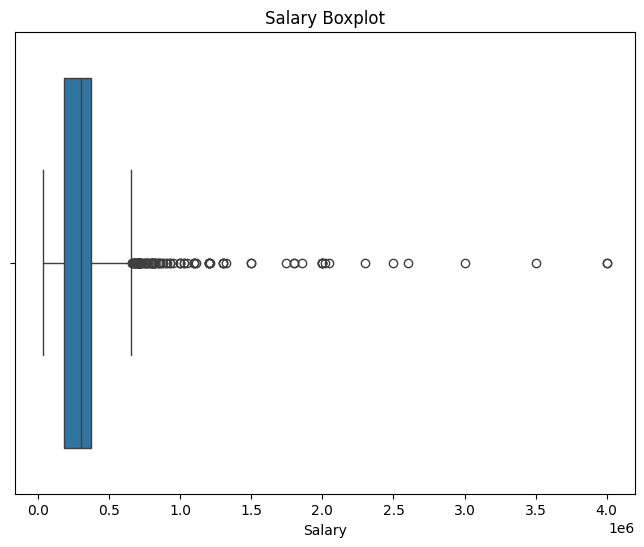

In [4]:

# Boxplot for Salary to check for outliers
plt.figure(figsize=(8,6))
sns.boxplot(x='Salary', data=df)
plt.title('Salary Boxplot')
plt.show()


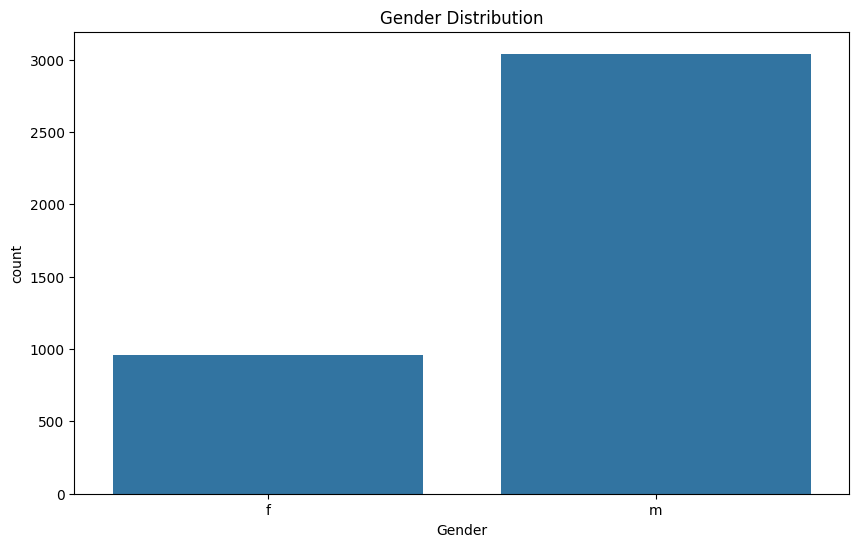

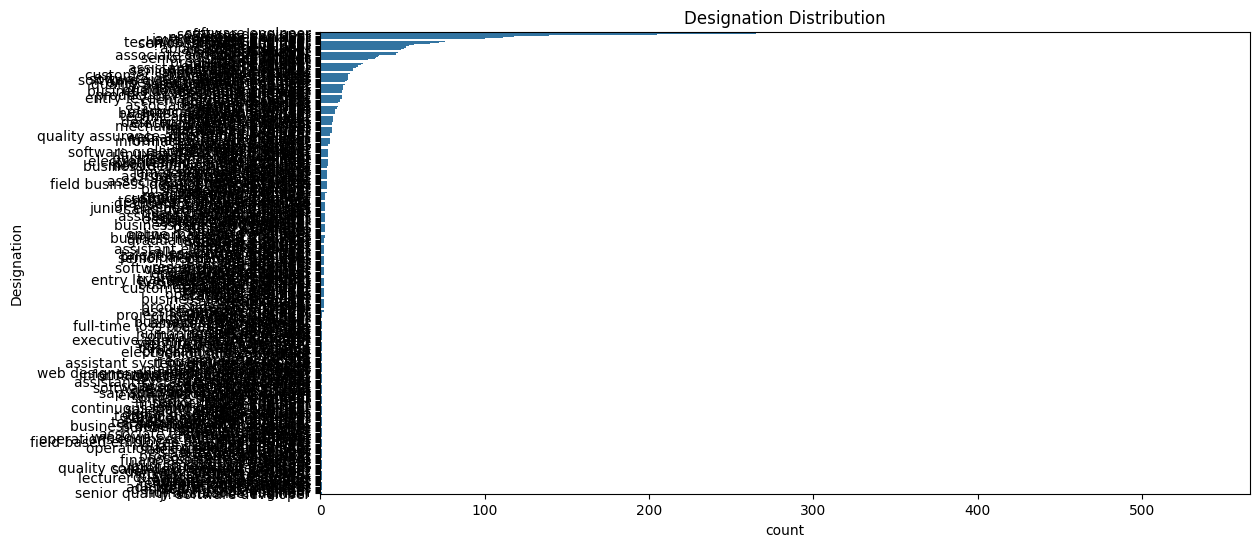

In [5]:

# Countplot for categorical variables (e.g., 'Gender', 'Designation')
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(y='Designation', data=df, order=df['Designation'].value_counts().index)
plt.title('Designation Distribution')
plt.show()


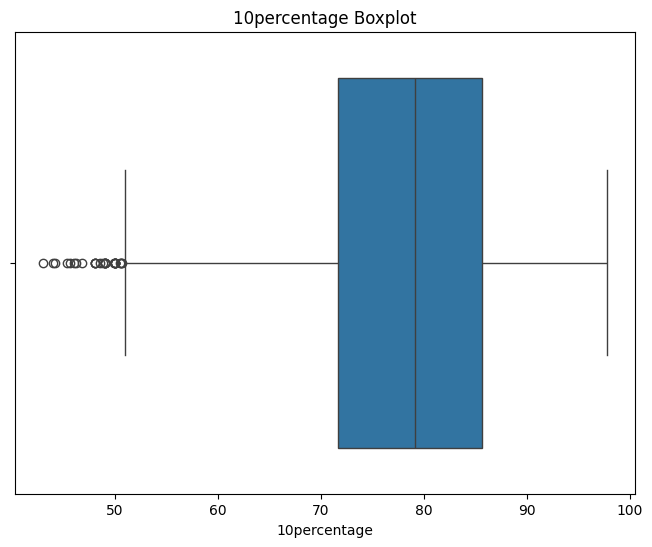

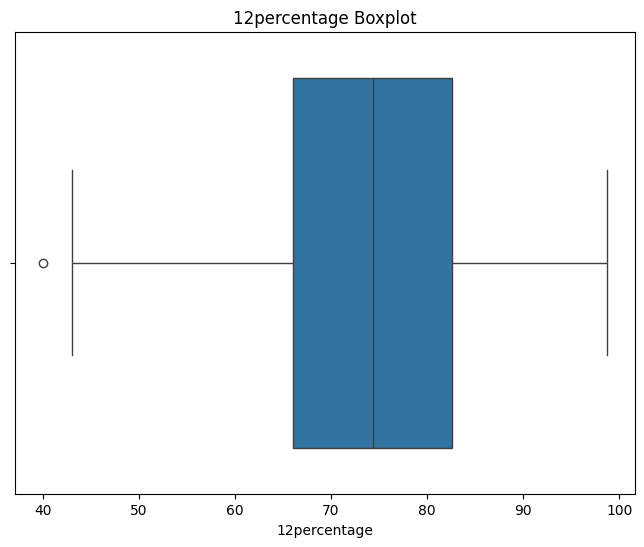

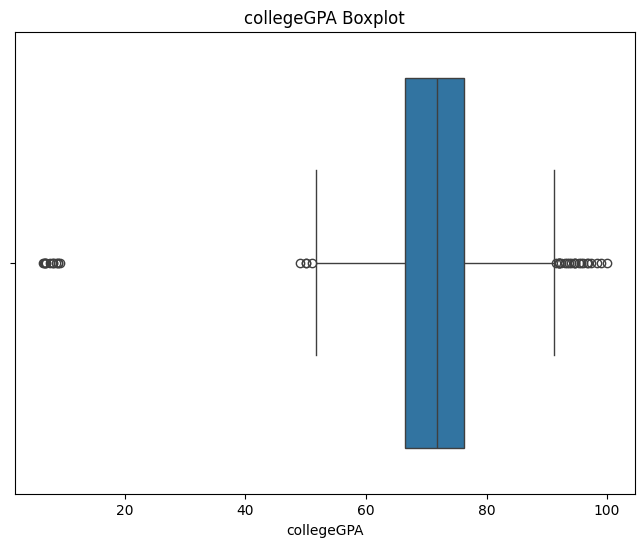

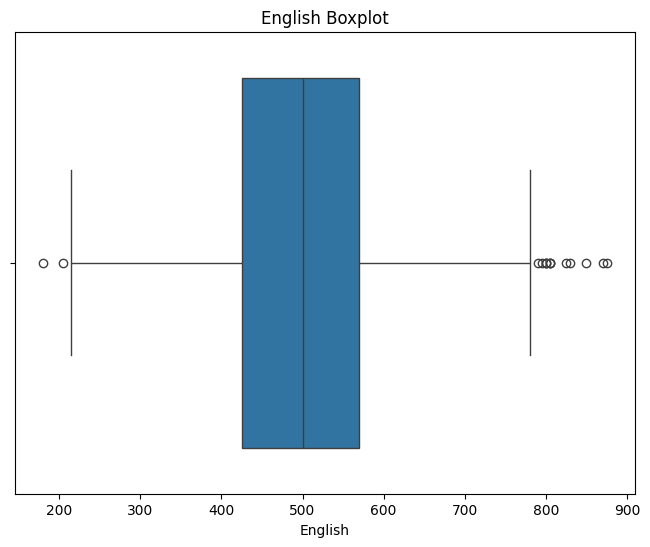

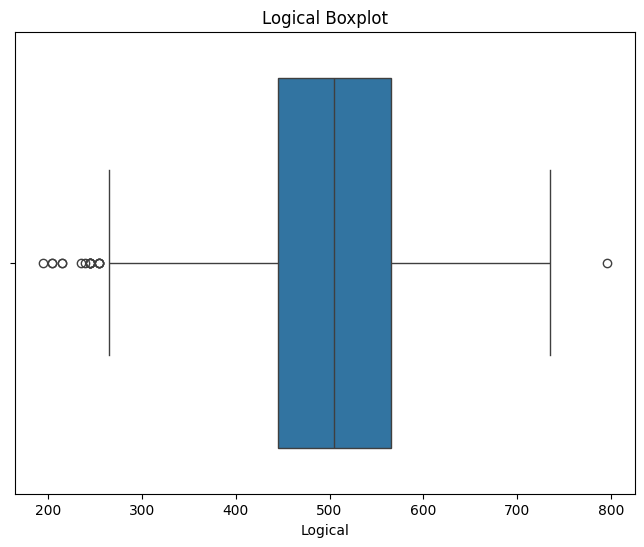

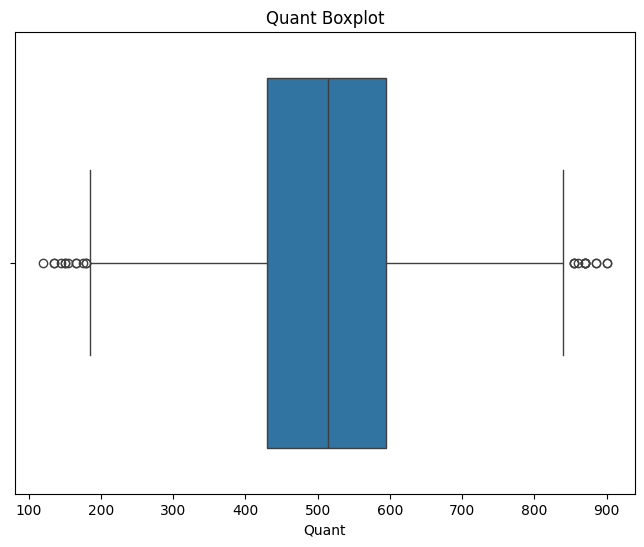

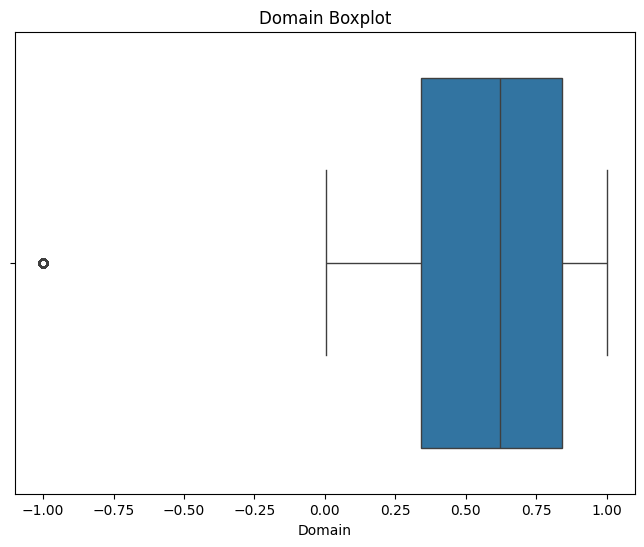

In [6]:

# Step 3: Outliers detection
# Checking for outliers in numerical columns using boxplots
numerical_cols = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain']
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=col, data=df)
    plt.title(f'{col} Boxplot')
    plt.show()


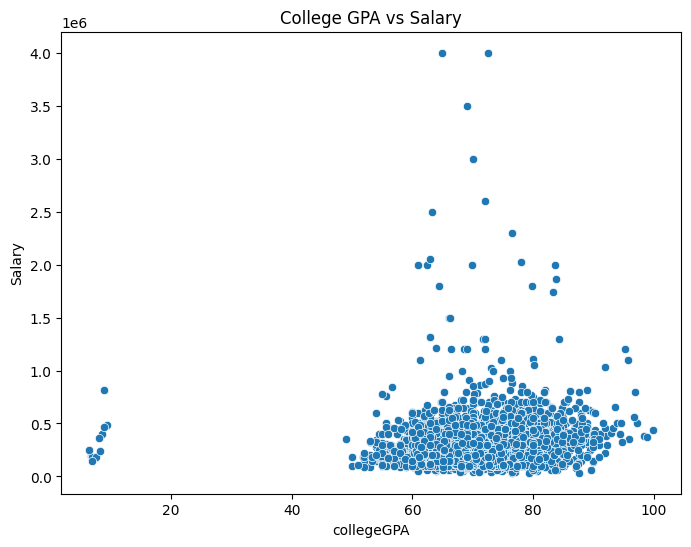

In [7]:

# Step 4: Bivariate Analysis
# Scatter plot to identify relationships between 'Salary' and numerical columns
plt.figure(figsize=(8,6))
sns.scatterplot(x='collegeGPA', y='Salary', data=df)
plt.title('College GPA vs Salary')
plt.show()


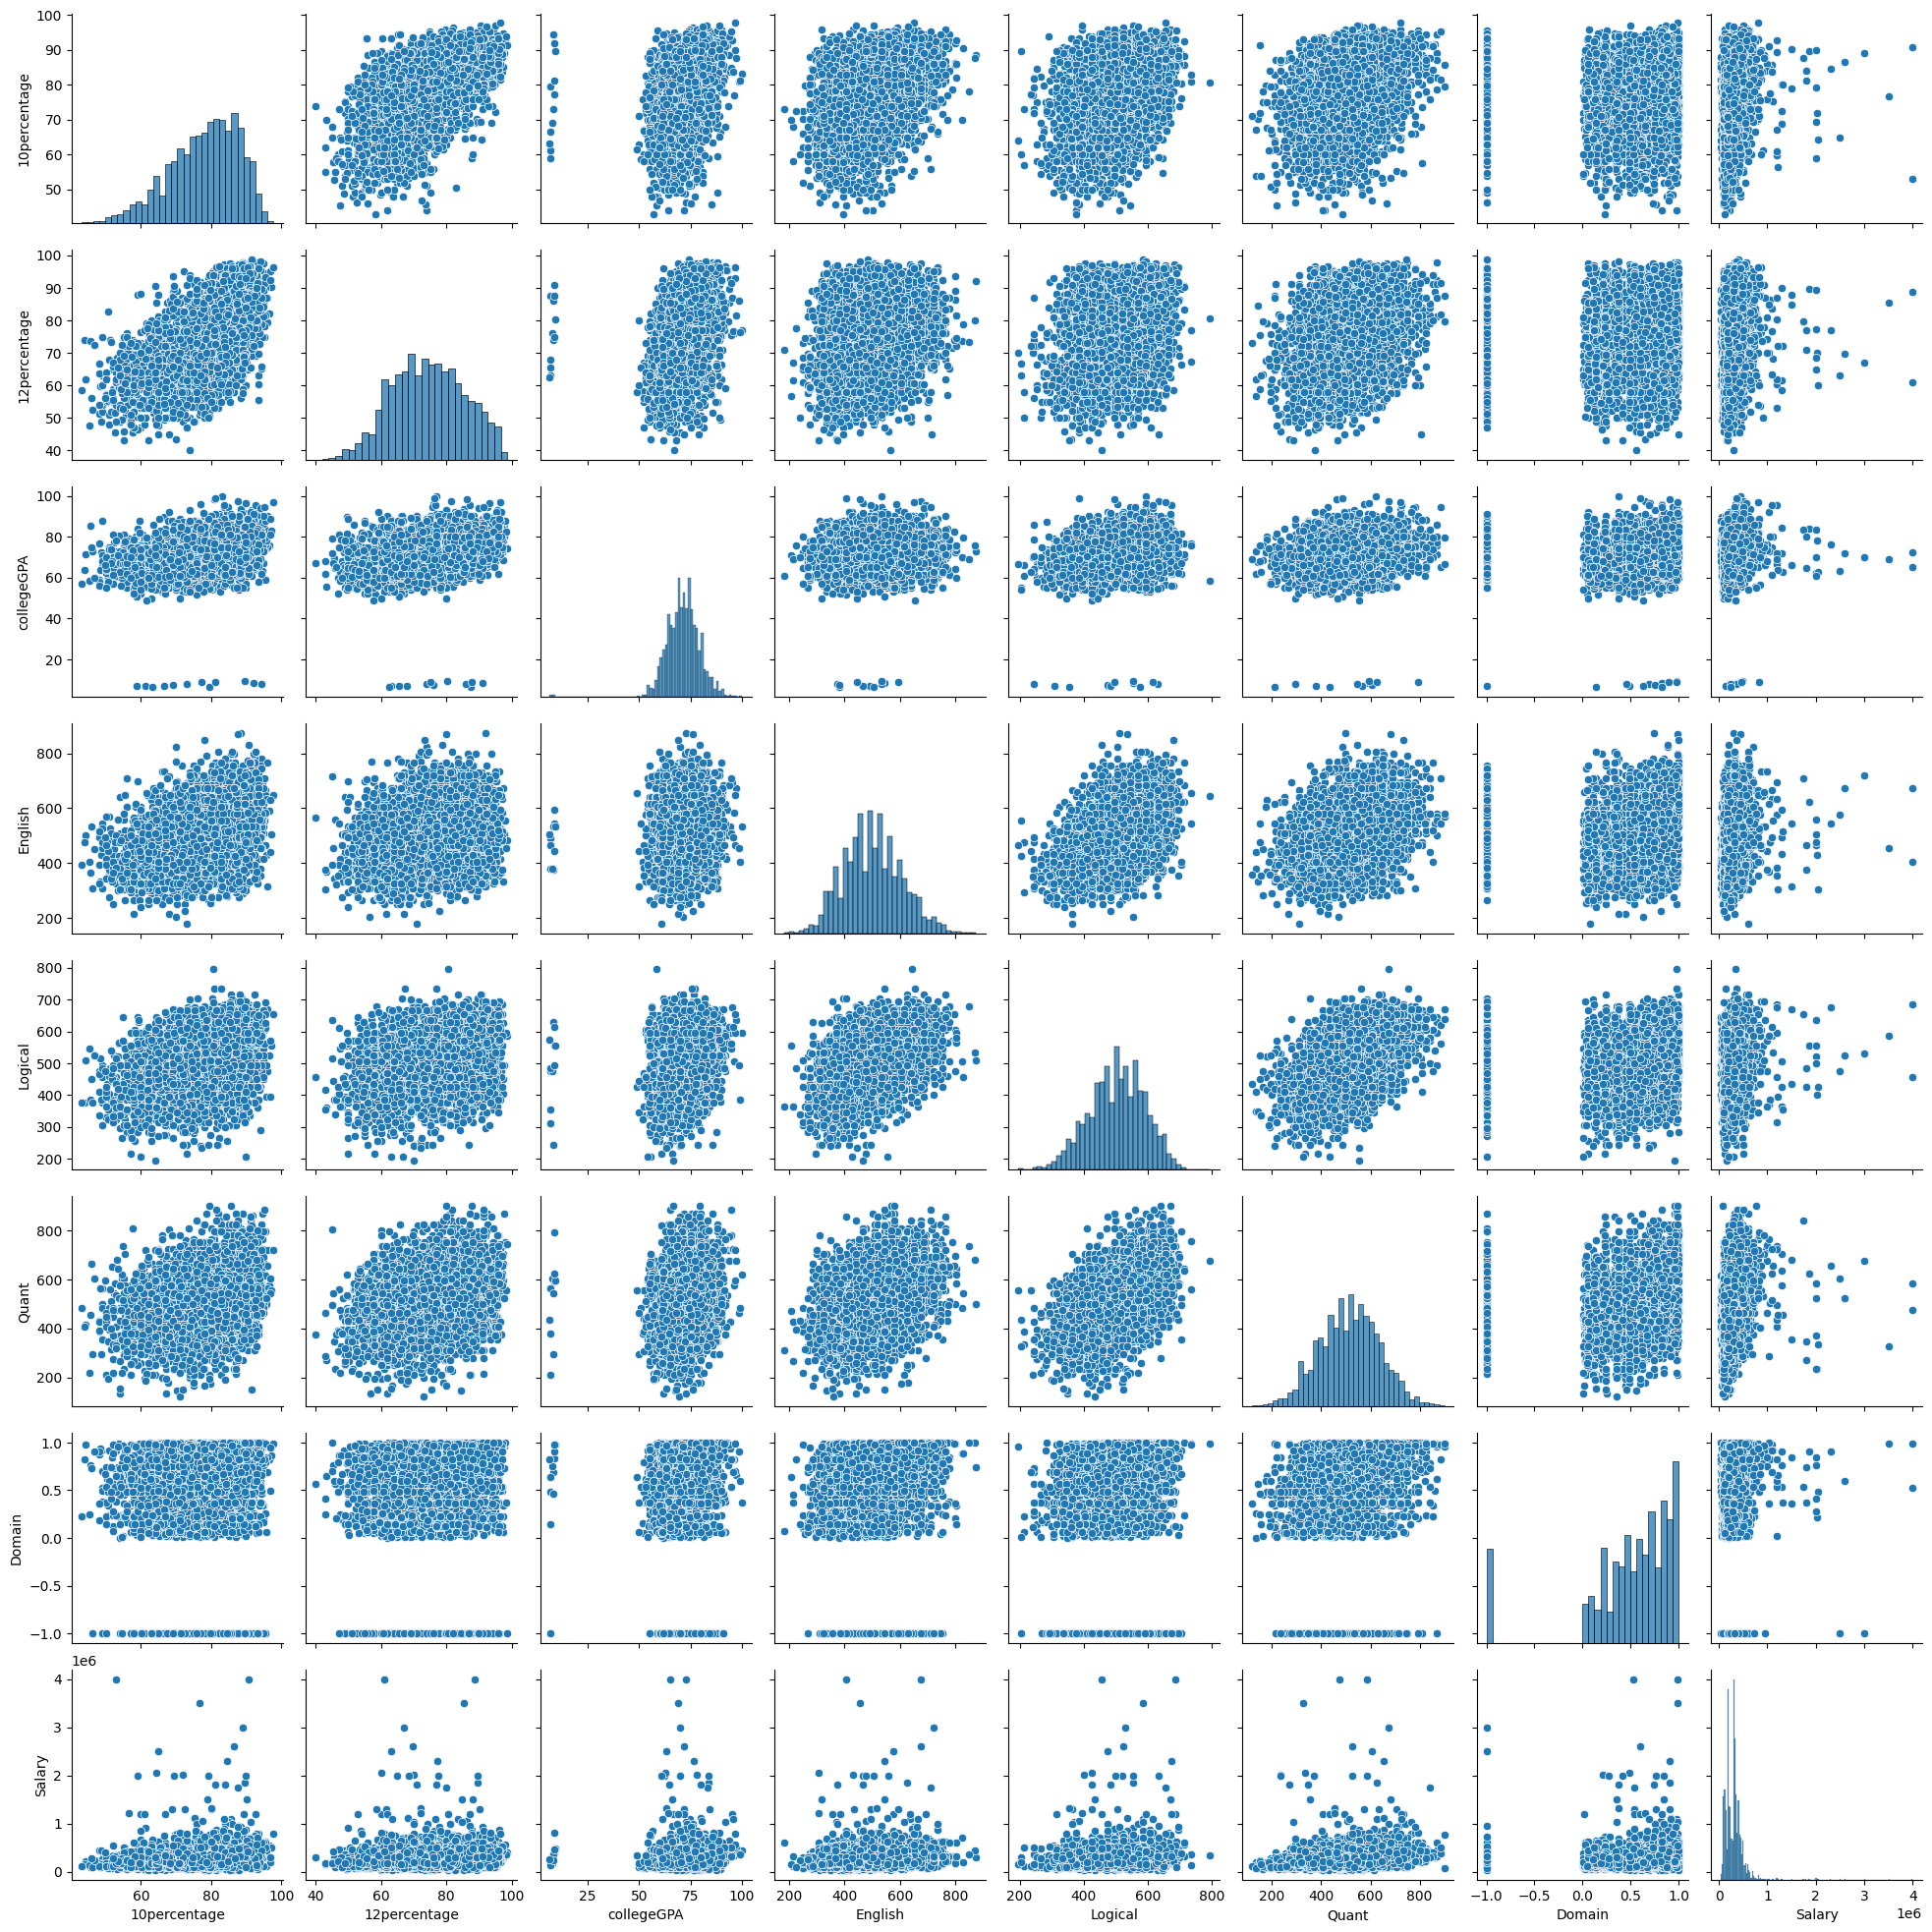

In [8]:

# Pairplot to identify relationships between numerical variables
sns.pairplot(df[numerical_cols + ['Salary']])
plt.show()


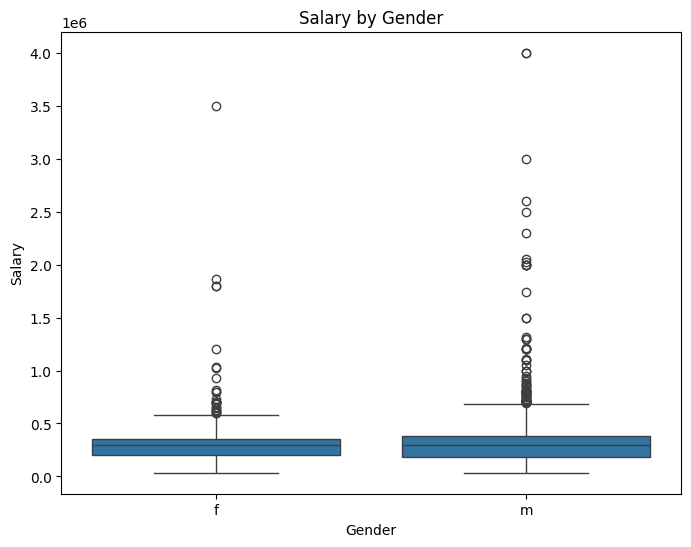

In [9]:

# Categorical vs Numerical - Boxplot of Salary by Gender
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary by Gender')
plt.show()


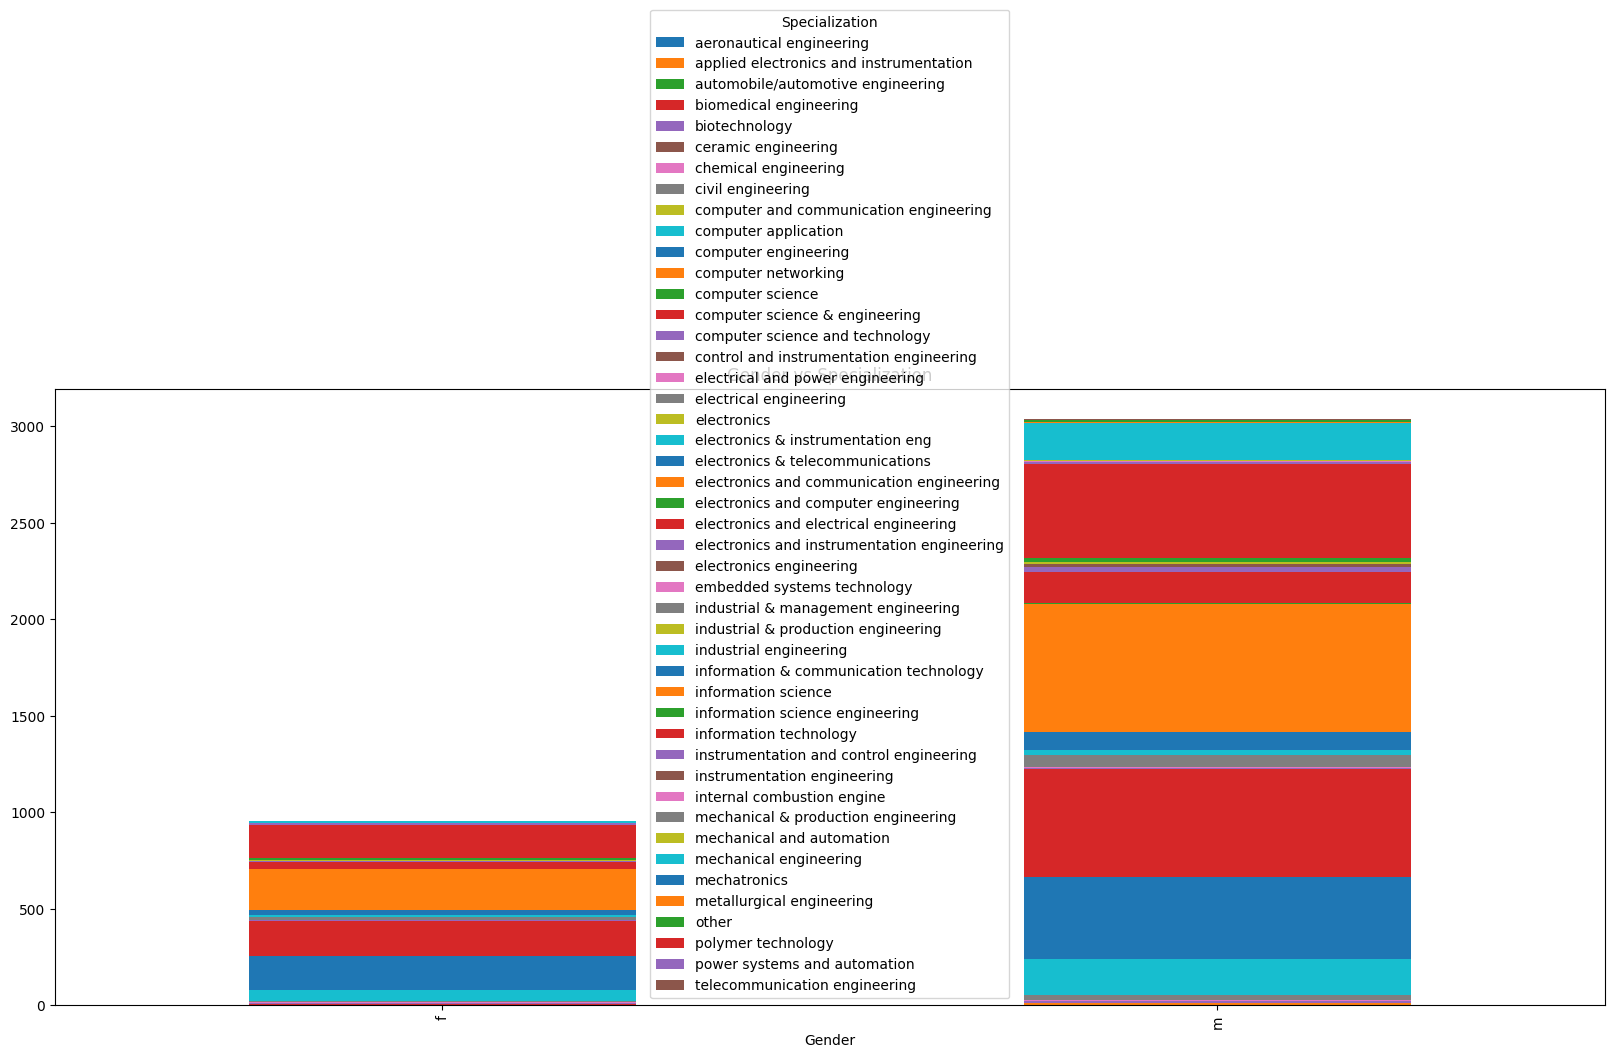

In [13]:

# Categorical vs Categorical - Stacked bar plot (Gender vs Specialization)
gender_specialization = pd.crosstab(df['Gender'], df['Specialization'])
gender_specialization.plot(kind='bar', stacked=True, figsize=(20,8))
plt.title('Gender vs Specialization')
plt.show()


In [11]:

# Step 5: Research Questions
# Question 1: Does Salary align with the claim of fresh graduates earning 2.5-3 lakhs?
fresh_graduate_designations = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
fresh_graduates = df[df['Designation'].isin(fresh_graduate_designations)]
avg_salary = fresh_graduates['Salary'].mean()
print(f"Average salary of fresh graduates: {avg_salary}")

# Testing if average salary lies within 2.5 - 3 lakhs
if 2.5 <= avg_salary <= 3:
    print("The claim holds true.")
else:
    print("The claim does not hold true.")


Average salary of fresh graduates: nan
The claim does not hold true.


Gender vs Specialization:
Specialization  aeronautical engineering  \
Gender                                     
f                                      1   
m                                      2   

Specialization  applied electronics and instrumentation  \
Gender                                                    
f                                                     2   
m                                                     7   

Specialization  automobile/automotive engineering  biomedical engineering  \
Gender                                                                      
f                                               0                       2   
m                                               5                       0   

Specialization  biotechnology  ceramic engineering  chemical engineering  \
Gender                                                                     
f                           9                    0                     1   
m                      

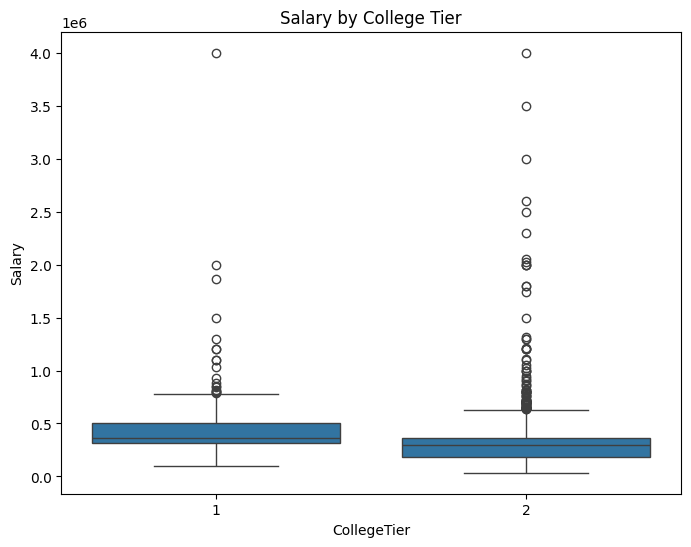

In [12]:

# Question 2: Is there a relationship between gender and specialization?
gender_specialization_table = pd.crosstab(df['Gender'], df['Specialization'])
print("Gender vs Specialization:")
print(gender_specialization_table)

# Conclusion on gender vs specialization (Chi-Square test)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(gender_specialization_table)
print(f"Chi-square test statistic: {chi2}, p-value: {p}")
if p < 0.05:
    print("There is a significant relationship between gender and specialization.")
else:
    print("There is no significant relationship between gender and specialization.")

# Step 6: Conclusion
print("Conclusion: Based on the analysis, we have observed trends and relationships between various factors such as Salary, Gender, Specialization, etc.")

# Step 7 (Bonus): Additional interesting insights
# Example: Investigate the relationship between college tier and salary
plt.figure(figsize=(8,6))
sns.boxplot(x='CollegeTier', y='Salary', data=df)
plt.title('Salary by College Tier')
plt.show()